1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

---


# Assignment 2 (Statistical Machine Learning 2024)
# **Deadline: 18 October 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* __Please use LaTeX to write down equations/derivations/other math__! How to do that in Markdown cells can be found [here](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/), a starting point for various symbols is [here](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 2 consists of:
1. Classification and decision theory (30 points),
2. __Bayesian linear regression (20 points)__,
3. Sequential learning (50 points).

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Exercise 2 - Bayesian Linear Regression (20 points)
This exercise builds on the exercise "Fitting a straight line to data". For a detailed description (and explanation) see _Exercises and Answers, Week 5_ in Brightspace. The final part of that exercise computed the predictive distribution after a single data point was observed. Here we consider a new data set, consisting of no less than _two_ points: $\{x_1, t_1\} = (0.4, 0.1)$ and $\{x_2, t_2\} = (0.6, -0.4)$.

### Part 1
Assume $\alpha = 1$ and $\beta = 15$. 
Compute the predictive distribution $p(t|x,\mathbf{t},\mathbf{x},\alpha,\beta)$ after these two points are observed. 

Taking from week 5 answers we have initial formulas. Then to train on two data points we calculate the predictive distribution by:
\begin{equation}
\mathbf{S}_N^{-1} = \begin{pmatrix} \alpha & 0 \\ 0 & \alpha \end{pmatrix} + N \beta \begin{pmatrix} 1 & \frac{1}{N} \sum_n x_n \\ \frac{1}{N} \sum_n x_n & \frac{1}{N} \sum_n x_n^2 \end{pmatrix} = \begin{pmatrix} \alpha & 0 \\ 0 & \alpha \end{pmatrix} + 2 \beta \begin{pmatrix} 1 & \frac{1}{2} (x_1 + x_2) \\ \frac{1}{2} (x_1 + x_2) & \frac{1}{2} (x_1^2 + x_2^2) \end{pmatrix}
\end{equation}

\begin{equation}
m(x) = \phi(x)^T \mathbf{m}_N = N \beta \begin{pmatrix} 1 & x \end{pmatrix} \mathbf{S}_N \begin{pmatrix} \frac{1}{N} \sum_n t_n \\ \frac{1}{N} \sum_n x_n t_n \end{pmatrix} = 2 \beta \begin{pmatrix} 1 & x \end{pmatrix} \mathbf{S}_N \begin{pmatrix} \frac{1}{2} (t_1 + t_2) \\ \frac{1}{2} (x_1t_1+x_2t_2)\end{pmatrix}
\end{equation}

\begin{equation}
s^2(x) = \beta^{-1} + \phi(x)^T \mathbf{S}_N \phi(x) = \beta^{-1} + \begin{pmatrix} 1 & x \end{pmatrix} \mathbf{S}_N \begin{pmatrix} 1 \\ x \end{pmatrix}
\end{equation}

After plugging number in:
\begin{equation}
\mathbf{S}_N^{-1} = \begin{pmatrix} 31 & 15 \\ 15 & 8.8 \end{pmatrix} 
\end{equation}

\begin{equation}
m(x) =  30 \begin{pmatrix} 1 & x \end{pmatrix} \mathbf{S}_N \begin{pmatrix} -0.15 \\ -0.1\end{pmatrix}
\end{equation}

\begin{equation}
s^2(x) =  \frac{1}{15} + \begin{pmatrix} 1 & x \end{pmatrix} \mathbf{S}_N \begin{pmatrix} 1 \\ x \end{pmatrix}
\end{equation}

For part 3:
\begin{equation}
 \mathbf{m}_N = N \beta  \mathbf{S}_N \begin{pmatrix} \frac{1}{N} \sum_n t_n \\ \frac{1}{N} \sum_n x_n t_n \end{pmatrix} = 2 \beta  \mathbf{S}_N \begin{pmatrix} \frac{1}{2} (t_1 + t_2) \\ \frac{1}{2} (x_1t_1+x_2t_2)\end{pmatrix}
\end{equation}

Please also provide the mean and variance in code (for an array of points).

In [2]:
"""
Compute the mean and the variance of the predictive distribution.
mx : array
    The mean for an array of points.
s2x : array
    The variance for an array of points.
"""
# We set x to (say) 101 points over the interval x = [0, 1]. (Please do not change.)
x = np.linspace(0, 1, 101)
S_n_inverse = np.array([[31, 15], [15, 8.8]])
S_n = np.linalg.inv(S_n_inverse)

# calculating m_x function
m_term_two = S_n @ np.array([-0.15, -0.1]).T
def calc_mx(x):
    term_one = np.array([np.array([30, 30*x_n]) for x_n in x])
    return term_one @ m_term_two
mx = calc_mx(x)

# calculating s_x function
def calc_s2x(x):
    one_and_x_array = np.array([np.array([1, x_n]) for x_n in x])
    s2x = []
    for phi in one_and_x_array:
        s2x.append((1 / 15) + phi @ S_n @ phi.T)
    return np.array(s2x)
s2x = calc_s2x(x)

In [3]:
"""
Hidden test for mx and s2x over the interval [0,1].
"""

'\nHidden test for mx and s2x over the interval [0,1].\n'

### Part 2
Plot the mean of the predictive Gaussian distribution and one standard deviation on both sides as a function of $x$ over the interval $[0, 1]$. Plot the data in the same figure.

**Hint:** See some ideas for plotting in `example_plot1`.

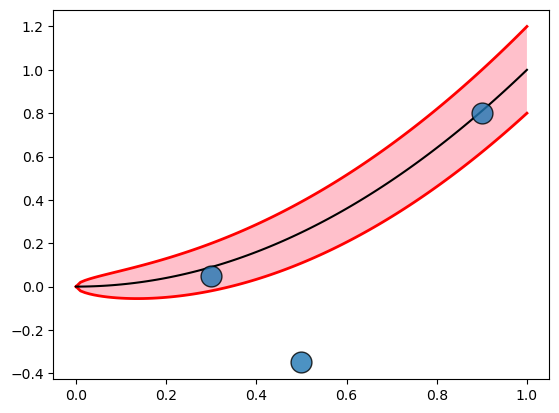

In [4]:
def example_plot1(x):
    """
    Example for plotting a function with data points, mean and standard deviation.
    x: array of points over the interval[0, 1], e.g., x = np.linspace(0, 1, 101)
    """
    # Generate some bogus data and predictive distribution, for illustration purposes.
    # You should use your own data, functions, and std. dev!
    Xn = np.array([0.3, 0.5, 0.9])
    Tn = np.array([0.05, -0.35, 0.8])
    mx = x**2
    sx = 0.2 * np.sqrt(x)

    plt.figure(1)
    # first the m(x) +/- s(x) areas (no line)
    plt.fill_between(x, mx - sx, mx + sx, facecolor = 'pink')
    # the lines for the predictive mean m(x) and deviation s(x) around it
    plt.plot(x, mx + sx, 'r', linewidth = 2)
    plt.plot(x, mx - sx, 'r', linewidth = 2)
    plt.plot(x, mx, 'k')
    # circle the data points
    plt.plot(Xn, Tn, 'o', markeredgecolor = 'black', alpha = 0.8, linewidth = 2, markersize = 15)

example_plot1(x)

Compare your plot with Figure 3.8b (Bishop, p.157) and explain the differences. 

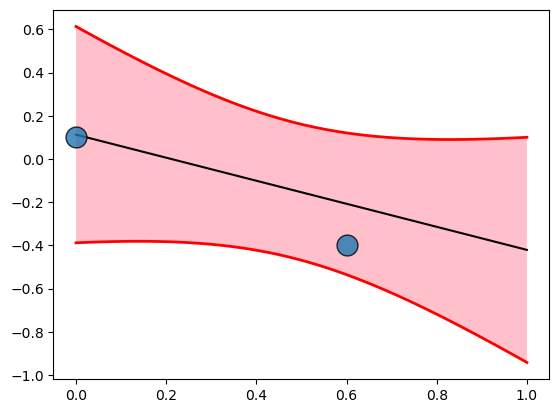

In [5]:
"""
Plot the mean of the predictive distribution with the standard deviation and the data.
"""
def plotting_part2(x):
    # with our mx and sx
    Xn = np.array([0., 0.6])
    Tn = np.array([0.1, -0.4])
    mx = calc_mx(x)
    sx = np.sqrt(calc_s2x(x))
    
    plt.figure(1)
    # first the m(x) +/- s(x) areas (no line)
    plt.fill_between(x, mx - sx, mx + sx, facecolor = 'pink')
    # the lines for the predictive mean m(x) and deviation s(x) around it
    plt.plot(x, mx + sx, 'r', linewidth = 2)
    plt.plot(x, mx - sx, 'r', linewidth = 2)
    plt.plot(x, mx, 'k')
    # circle the data points
    plt.plot(Xn, Tn, 'o', markeredgecolor = 'black', alpha = 0.8, linewidth = 2, markersize = 15)
plotting_part2(x)

<b>Answer</b>
In Figure 3.8b (Bishop, p.157) we observe that function the authors try to approximate is sin, which is more complicated than in our example, also two points that we're given are further apart than in the 3.8b, which allow us to have more certainty over wider range than in their example.

### Part 3
Sample five functions $y(x,\mathbf{w})$ from the posterior distribution over $\mathbf{w}$ for this data set and plot them in the same graph (i.e. with the predictive distribution). You may use `np.random.multivariate_normal`.

**Hint:** See `example_plot2` for some plotting hints.

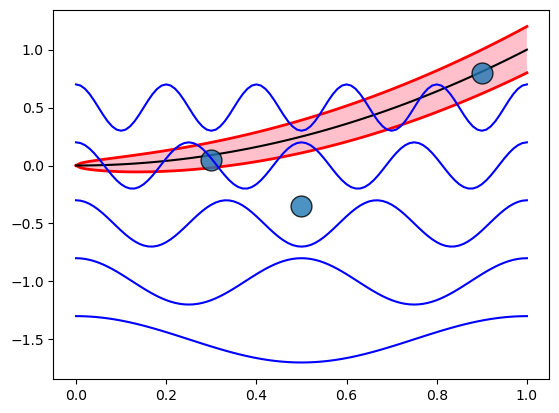

In [6]:
def example_plot2(x):
    """
    Example for plotting random functions together with the previous plot (example_plot1).
    x: array of points over the interval [0, 1], e.g., x = np.linspace(0, 1, 101)
    """
    example_plot1(x)
    
    # five made-up functions, again only for illustration purposes
    # You should generate your own functions for the second plot!
    for i in range(5):
        # NB: These are not the functions that you need!
        y = np.cos(2 * np.pi * (i+1) * x) / 5 + (i - 3) / 2
        plt.plot(x, y, 'b', linewidth = 1.5)

example_plot2(x)

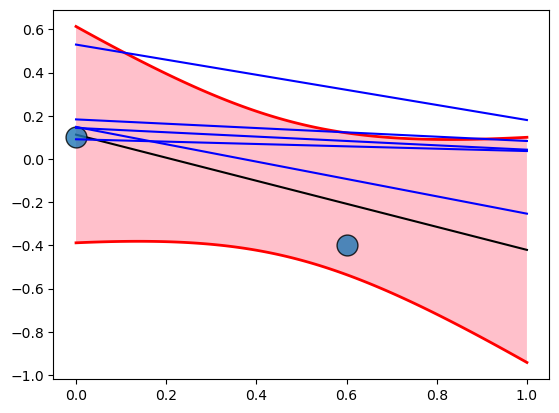

In [7]:
def example_plot2(x):

    plotting_part2(x)
    
    m_N = 30 * S_n @ m_term_two
    for i in range(5):
        w = np.random.multivariate_normal(mean = m_N, cov = S_n)
        y = w[0] + w[1]*x
        plt.plot(x, y, 'b', linewidth = 1.5)

example_plot2(x)